In [1]:
import geopandas 
import matplotlib.pyplot as plt
from   matplotlib.pyplot import imread
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeat
import cartopy.io.shapereader as shpreader
from   cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import shapely.geometry as sgeom


%matplotlib inline

In [2]:
cuencas_hidro_gdf              = geopandas.read_file('../shape_files/rd_shapes/vectores/Cuencas_Hidrograficas_RD.shp')
cuencas_presas_gdf             = geopandas.read_file('../shape_files/rd_shapes/vectores/Presas-CuencasAporte.shp')

cuencas_hidro_gdf              = cuencas_hidro_gdf.to_crs("EPSG:4326")
cuencas_presas_gdf             = cuencas_presas_gdf.to_crs("EPSG:4326")

In [3]:
cuencas_presas_gdf = cuencas_presas_gdf.drop(columns=['ACUEDUCTM3', 'AREA', 'PERIMETER', 'ACRES', 
                                                      'HECTARES', 'Km', 'ENCLOSED_A', 'ISLAND_ARE', 'Id', 'LAYER',
                                                      'GM_TYPE', 'PROPOSITO', 'RIEGO_HA', 'POTENCIA_M', 'OPERACIO_1',
                                                      'GEN_GWH_A', 'REGION_HID', 'COTA_OPERA', 'ENCLOSED_1', 
                                                      'ENCLOSED_2', 'ELEVATION', 'NAME', 'GM_LAYER', 'TIPO_PRESA',
                                                      'ALTURA_MTS', 'RIO', 'V_DIS_MM3', 'V_S_BATMM3'])


In [4]:
nombres = ['Bao', 'Tavera', 'Sabaneta', 'Sabana Yegua', 'Rincon', 'Moncion', 'Jiguey', 'Valdesia', 'Hatillo', 
          'Moncion', 'Tavera-bao', 'Valdesia', 'Hatillo', 'Rincon', '', 'Tavera-Bao', 'Jiguey', 'Sabaneta', 
          'Sabana Yegua']

cuencas = ['Yaque del Norte', 'Yaque del Norte', 'Yaque del Sur', 'Yaque del Sur', 'Yuna-Camu', 
           'Yaque del Norte', 'Nizao', 'Nizao', 'Yuna-Camu', 'Yaque del Norte', 'Yaque del Norte', 'Nizao',
           'Yuna-Camu', 'Yuna-Camu', '', 'Yaque del Norte', 'Nizao', 'Yaque del Sur', 'Yaque del Sur']

cuencas_presas_gdf['Nombre'] = nombres
cuencas_presas_gdf['Cuenca'] = cuencas

cuencas_presas_gdf = cuencas_presas_gdf[['Nombre', 'Cuenca', 'geometry']]

#cuencas_presas_gdf = cuencas_presas_gdf.drop(14)
cuencas_presas_gdf_ = cuencas_presas_gdf[:9]

In [5]:
map_crs = ccrs.PlateCarree()
data_crs= ccrs.PlateCarree()

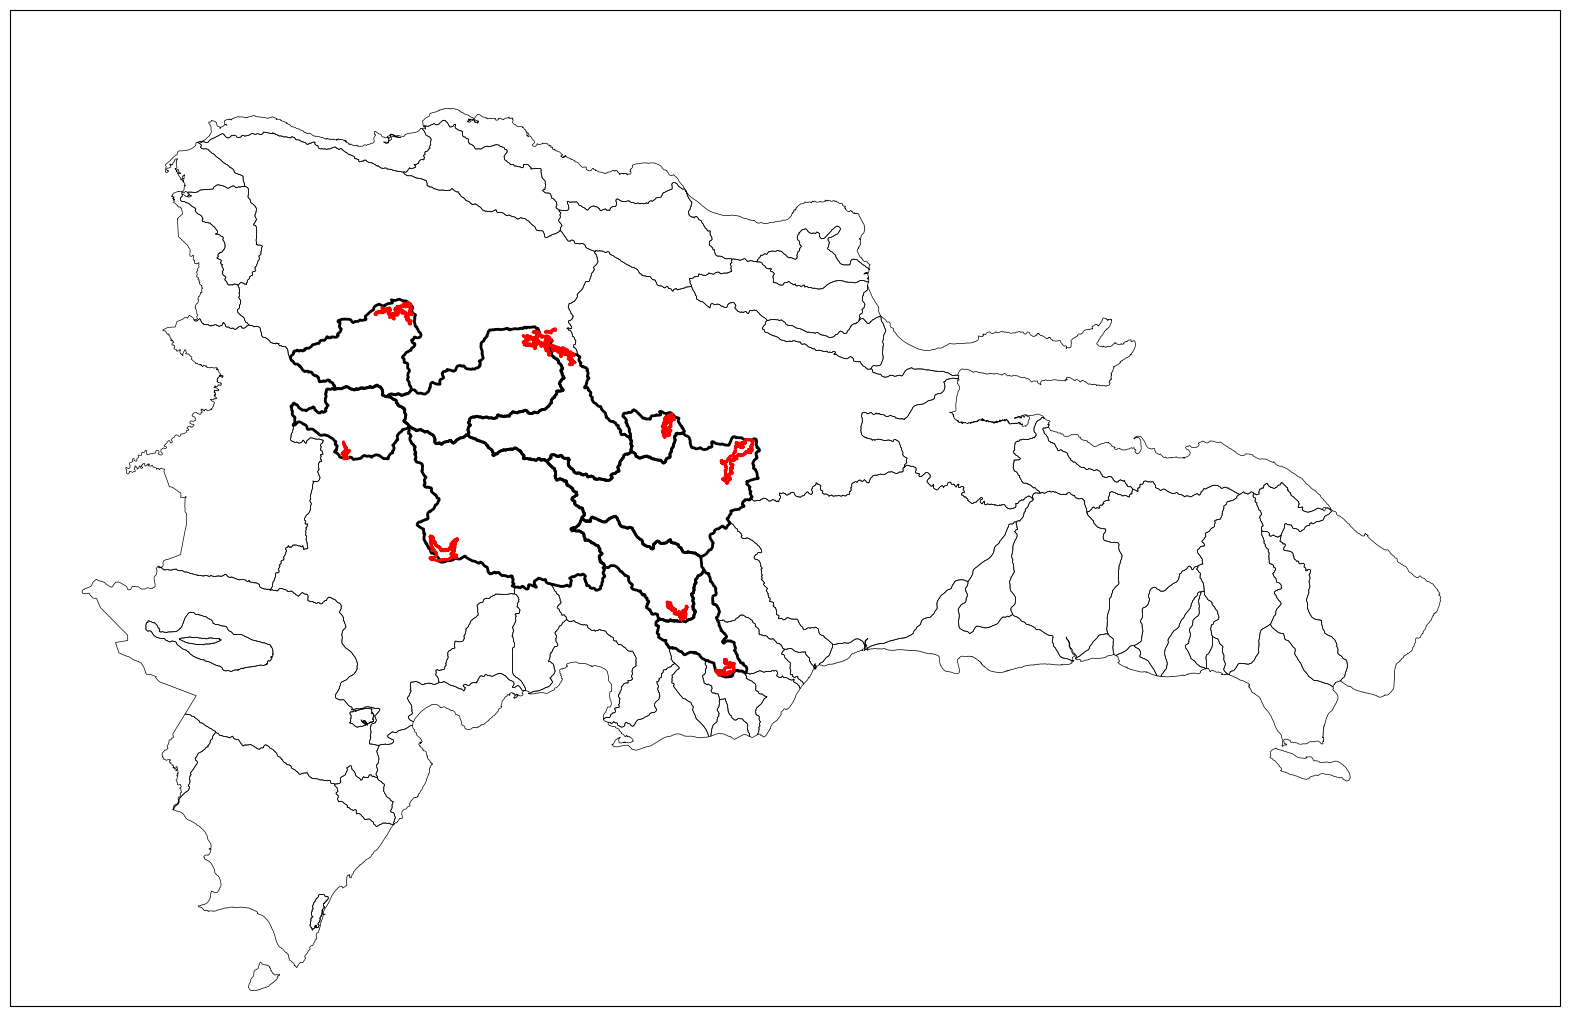

In [6]:
fig = plt.figure(figsize=(20, 20))
ax  = plt.subplot(1, 1, 1, projection = map_crs)
ax.set_extent([-72.2, -68, 17.5, 20.2])

cuencas = ['NIZAITO', 'NIZAO', 'YAQUE DEL SUR', 'OZAMA', 'ALTO YUNA', 'HAINA', 'YAQUE DEL NORTE']
#cuenca_extracted = cuencas_hidro_gdf[cuencas_hidro_gdf['NOMBRE'] == cuencas[6]]

# ax.add_geometries(hispaniola_gdf['geometry'], crs=data_crs, facecolor='none',
#                   edgecolor='black', linewidth=1)
ax.add_geometries(cuencas_hidro_gdf['geometry'], crs=data_crs, facecolor='none',
                  edgecolor='black', linewidth=0.5)

ax.add_geometries(cuencas_presas_gdf['geometry'][:9], crs=data_crs, facecolor='none',
                  edgecolor='black', linewidth=2)

ax.add_geometries(cuencas_presas_gdf['geometry'][9:], crs=data_crs, facecolor='none',
                  edgecolor='red', linewidth=2)
# ax.add_geometries(cuenca_extracted['geometry'], crs=data_crs, facecolor='none',
#                  edgecolor='black', linewidth=2)

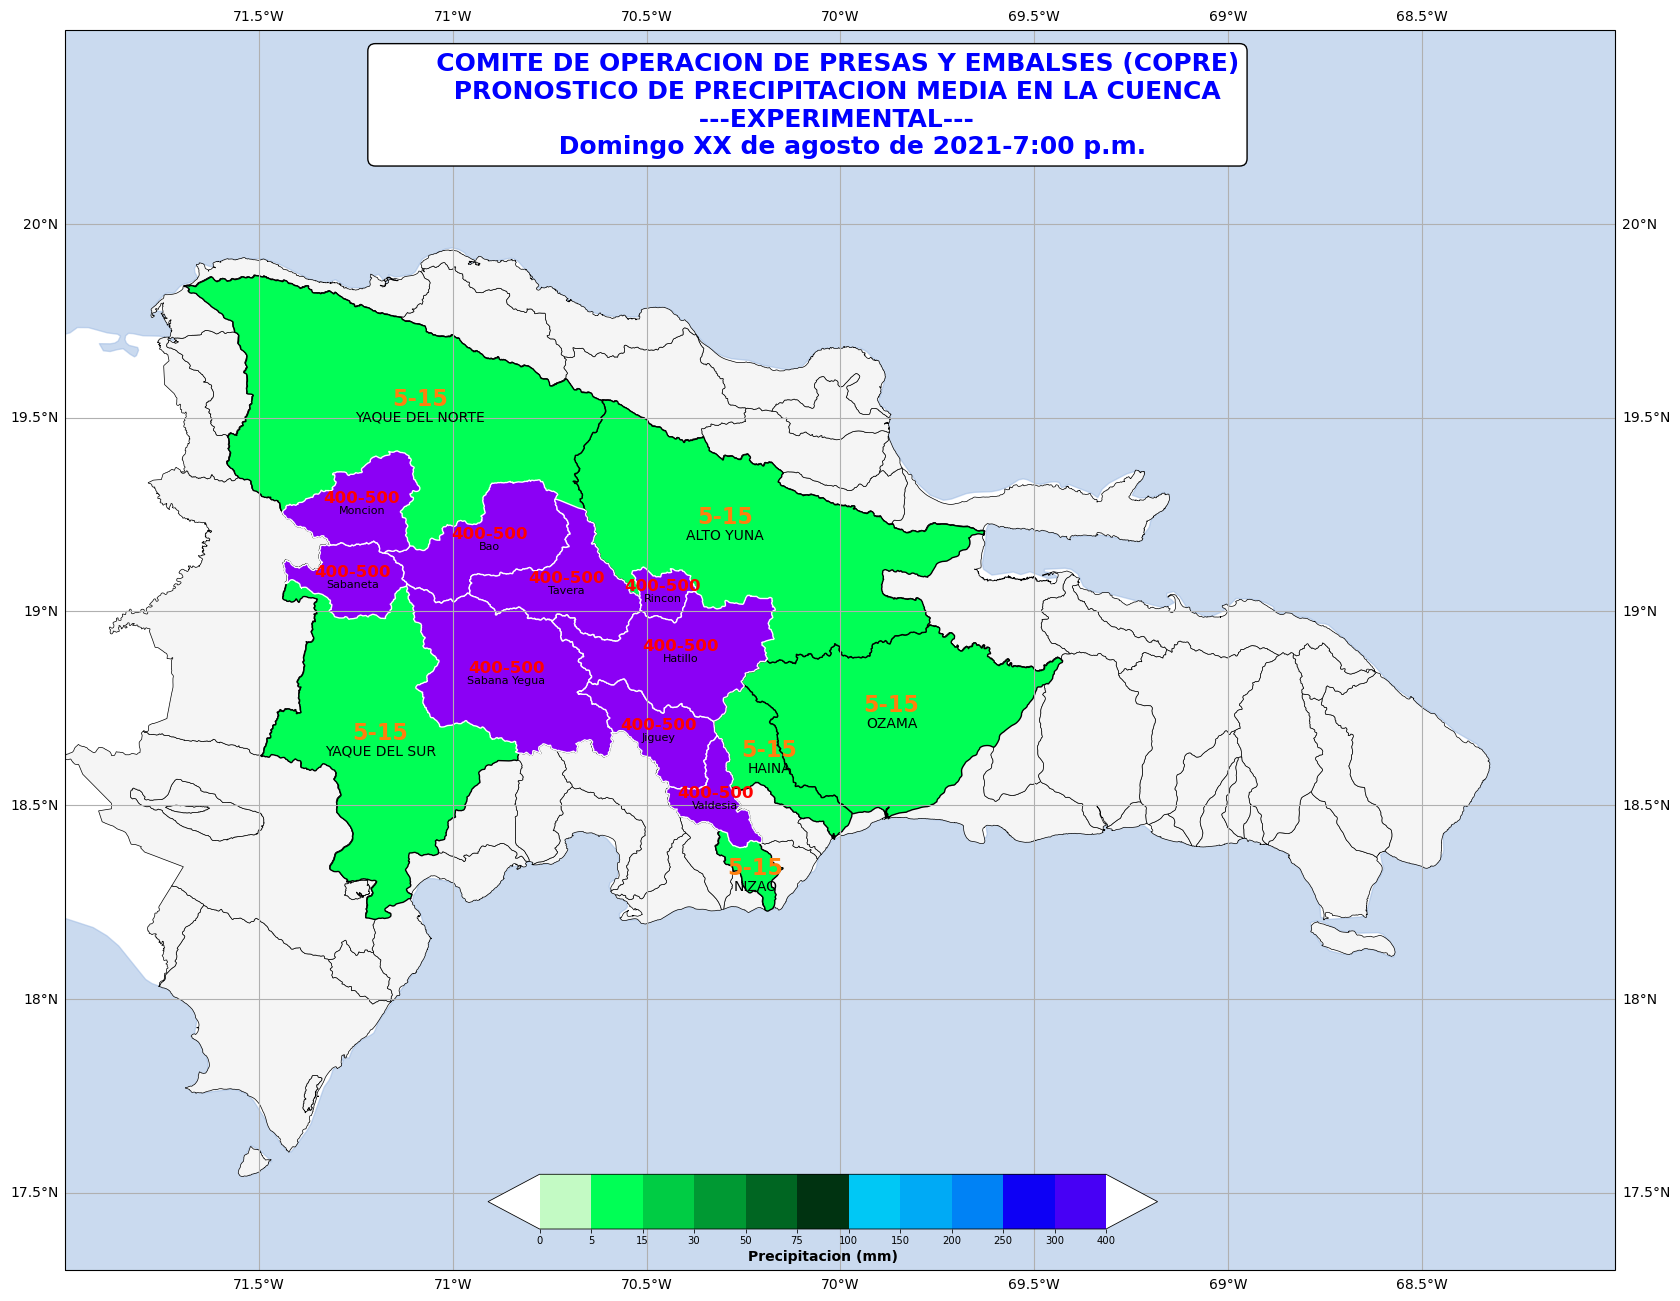

In [7]:
fig = plt.figure(figsize=(20, 20))
ax  = plt.subplot(1, 1, 1, projection = map_crs)
ax.set_extent([-72.0, -68, 17.3, 20.5])

grid_lines = ax.gridlines(draw_labels=True)
# grid_lines.xformatter = LONGITUDE_FORMATTER
# grid_lines.yformatter = LATITUDE_FORMATTER

# xtcks = [-72, -71.5, -71, -70.5, -70, -69.5, -69.0]
# ax.set_xticks(xtcks, crs=ccrs.PlateCarree())

# ax.add_geometries(hispaniola_gdf['geometry'], crs=data_crs, facecolor='none',
#                   edgecolor='black', linewidth=1)
ax.add_geometries(cuencas_hidro_gdf['geometry'], crs=data_crs, facecolor='whitesmoke',
                  edgecolor='black', linewidth=0.5)
ax.add_feature(cfeat.OCEAN.with_scale('10m'), alpha = 0.5)
values_and_colors = {
                     'values': ['0-5', '5-15'   , '15-30'  , '30-50'  , '50-75'  , '75-100', '100-150', '150-200',  
                                '200-250', '250-300', '300-400', '400-500'], 
    
                     'colors': ['#C3FAC4',  '#00FF55',  '#00CC44',  '#009933',   '#006622',  '#003311',  '#00C8F5',  
                                '#00AAF5',  '#0082F5',  '#0D00F5',   '#4700F5',  '#8B00F5'] 
                     }
mean_pp_in_the_watersheds =  {'NIZAO'          : ['#00FF55', '5-15'],
                              'YAQUE DEL SUR'  : ['#00FF55', '5-15'],
                              'OZAMA'          : ['#00FF55', '5-15'],
                              'ALTO YUNA'      : ['#00FF55', '5-15'],
                              'YAQUE DEL NORTE': ['#00FF55', '5-15'],
                              'HAINA'          : ['#00FF55', '5-15']
                             }
mean_pp_in_the_dams       =  {
                             'Bao'             : ['#8B00F5', '400-500'],
                             'Tavera'          : ['#8B00F5', '400-500'],
                             'Sabaneta'        : ['#8B00F5', '400-500'],
                             'Sabana Yegua'    : ['#8B00F5', '400-500'],
                             'Rincon'          : ['#8B00F5', '400-500'],
                             'Moncion'         : ['#8B00F5', '400-500'],
                             'Jiguey'          : ['#8B00F5', '400-500'],
                             'Valdesia'        : ['#8B00F5', '400-500'],
                             'Hatillo'         : ['#8B00F5', '400-500']
                             }
pp = []
cuencas_hidro_gdf_full = cuencas_hidro_gdf
cuencas_hidro_gdf = cuencas_hidro_gdf.loc[[28, 47, 48, 50, 54, 55]] 
# for watersheds in mean_pp_in_the_watersheds.keys():
#     for attempt in range(3):
#         try:
#             _  = str(input(f'{watersheds}: '))
#             __ = values_and_colors['values'].index(_)
#         except ValueError:
#             print('Este rango no esta permitido.')
#             continue
#         break
#     else:
#         print('numero de intentos agotados')
#         break
#     mean_pp_in_the_watersheds[watersheds] = [values_and_colors['colors'][__], _]
#     pp.append(_)
if pp:
    cuencas_hidro_gdf['PP'] = pp
    cuencas_hidro_gdf = cuencas_hidro_gdf[['NOMBRE', 'PP', 'geometry']]
else:
    pp = ['5-15', '5-15', '5-15', '5-15', '5-15', '5-15']
    cuencas_hidro_gdf['PP'] = pp
    cuencas_hidro_gdf = cuencas_hidro_gdf[['NOMBRE', 'PP', 'geometry']]
    
pp = []
cuencas_presas_gdf = cuencas_presas_gdf[:9] 
# for watersheds in mean_pp_in_the_dams.keys():
#     for attempt in range(3):
#         try:
#             _  = str(input(f'{watersheds}: '))
#             __ = values_and_colors['values'].index(_)
#         except ValueError:
#             print('Este rango no esta permitido.')
#             continue
#         break
#     else:
#         print('numero de intentos agotados')
#         break
#     mean_pp_in_the_dams[watersheds] = [values_and_colors['colors'][__], _]
#     pp.append(_)
if pp:
    cuencas_presas_gdf['PP'] = pp
    cuencas_presas_gdf = cuencas_presas_gdf[['Nombre', 'Cuenca', 'PP', 'geometry']]
else:
    pp = ['400-500', '400-500', '400-500', '400-500', '400-500', '400-500', '400-500', '400-500', '400-500']
    cuencas_presas_gdf['PP'] = pp
    cuencas_presas_gdf = cuencas_presas_gdf[['Nombre', 'Cuenca', 'PP', 'geometry']]
    
for cc_name in mean_pp_in_the_watersheds.keys():
    cc_subset = cuencas_hidro_gdf[cuencas_hidro_gdf['NOMBRE'] == cc_name]
    _ = mean_pp_in_the_watersheds[cc_name][0]
    ax.add_geometries(cc_subset['geometry'], facecolor=_,
                     edgecolor='black', crs=data_crs,
                     linewidth=1)
for cc_name in mean_pp_in_the_dams.keys():
    cc_subset = cuencas_presas_gdf_[cuencas_presas_gdf_['Nombre'] == cc_name]
    _ = mean_pp_in_the_dams[cc_name][0]
    ax.add_geometries(cc_subset['geometry'], facecolor=_,
                     edgecolor='white', crs=data_crs,
                     linewidth=1)

    

# ax.add_geometries(cuencas_hidro_gdf_full['geometry'], facecolor=None,
#                      edgecolor='black', crs=data_crs,
#                      linewidth=1)
# inside_coords        =[]
# centroid_name = cuencas_hidro_gdf.apply(lambda x: inside_coords.append(x.geometry.centroid.coords[0]), axis=1)
# inside_coords
    
inside_coords_lat = [18.30988448762174, 18.65760134123338, 18.72853130712674, 
                     19.215888515208702, 19.5201306566612, 18.614190289673694]

inside_coords_lon = [-70.2187673247053, -71.1865047734343,  -69.86783027131499, 
                     -70.2972762654869, -71.08462067184799, -70.1829676153929]

cuencas_hidro_gdf['INSIDE_COORDS_LAT'] = inside_coords_lat
cuencas_hidro_gdf['INSIDE_COORDS_LON'] = inside_coords_lon
cuencas_hidro_gdf                      = cuencas_hidro_gdf[['NOMBRE', 'PP', 'INSIDE_COORDS_LAT', 'INSIDE_COORDS_LON', 'geometry']]

cuencas_hidro_gdf.apply(lambda   x: ax.annotate(text=x.NOMBRE, xy=(x.INSIDE_COORDS_LON, x.INSIDE_COORDS_LAT), 
                                              fontsize = 10, ha='center', weight = 'normal', 
                                              va = 'top'), axis=1)
       
# cuencas_hidro_gdf.apply(lambda   x: ax.annotate(text=x.NOMBRE, xy=x.geometry.centroid.coords[0], 
#                                               fontsize = 10, ha='center', weight = 'normal', 
#                                               va = 'top'), axis=1)
cuencas_hidro_gdf.apply(lambda   x: ax.annotate(text=x.PP, xy=(x.INSIDE_COORDS_LON, x.INSIDE_COORDS_LAT), 
                                              color = 'tab:orange', ha='center', weight = 'bold', 
                                              fontsize = 16, va = 'bottom'), axis=1)

cuencas_presas_gdf_.apply(lambda x: ax.annotate(text=x.Nombre, xy=x.geometry.centroid.coords[0], 
                                                fontsize = 8, ha='center', weight = 'normal', 
                                                va = 'top'), axis=1)
cuencas_presas_gdf.apply(lambda  x: ax.annotate(text=x.PP, xy=x.geometry.centroid.coords[0], 
                                               color = 'red', ha='center', weight = 'bold', 
                                               fontsize = 12, va = 'bottom'), axis=1)

props = dict(boxstyle='round', facecolor='white', alpha=1)
xtxt = 0.2
ytxt = 0.983
text = ['''       COMITE DE OPERACION DE PRESAS Y EMBALSES (COPRE)
         PRONOSTICO DE PRECIPITACION MEDIA EN LA CUENCA
                                     ---EXPERIMENTAL---
                     Domingo XX de agosto de 2021-7:00 p.m.''']
        
ax.text(xtxt, ytxt, text[0], transform=ax.transAxes, fontsize=18, verticalalignment='top', bbox=props, 
        weight = 'bold', color = 'blue')

colorbar = imread('colorbar.png')
fig.figimage(colorbar, 380, 0, zorder=100)

# logo = imread('../onamet-logo.jpg')
# fig.figimage(logo, 60, 790, zorder=100)



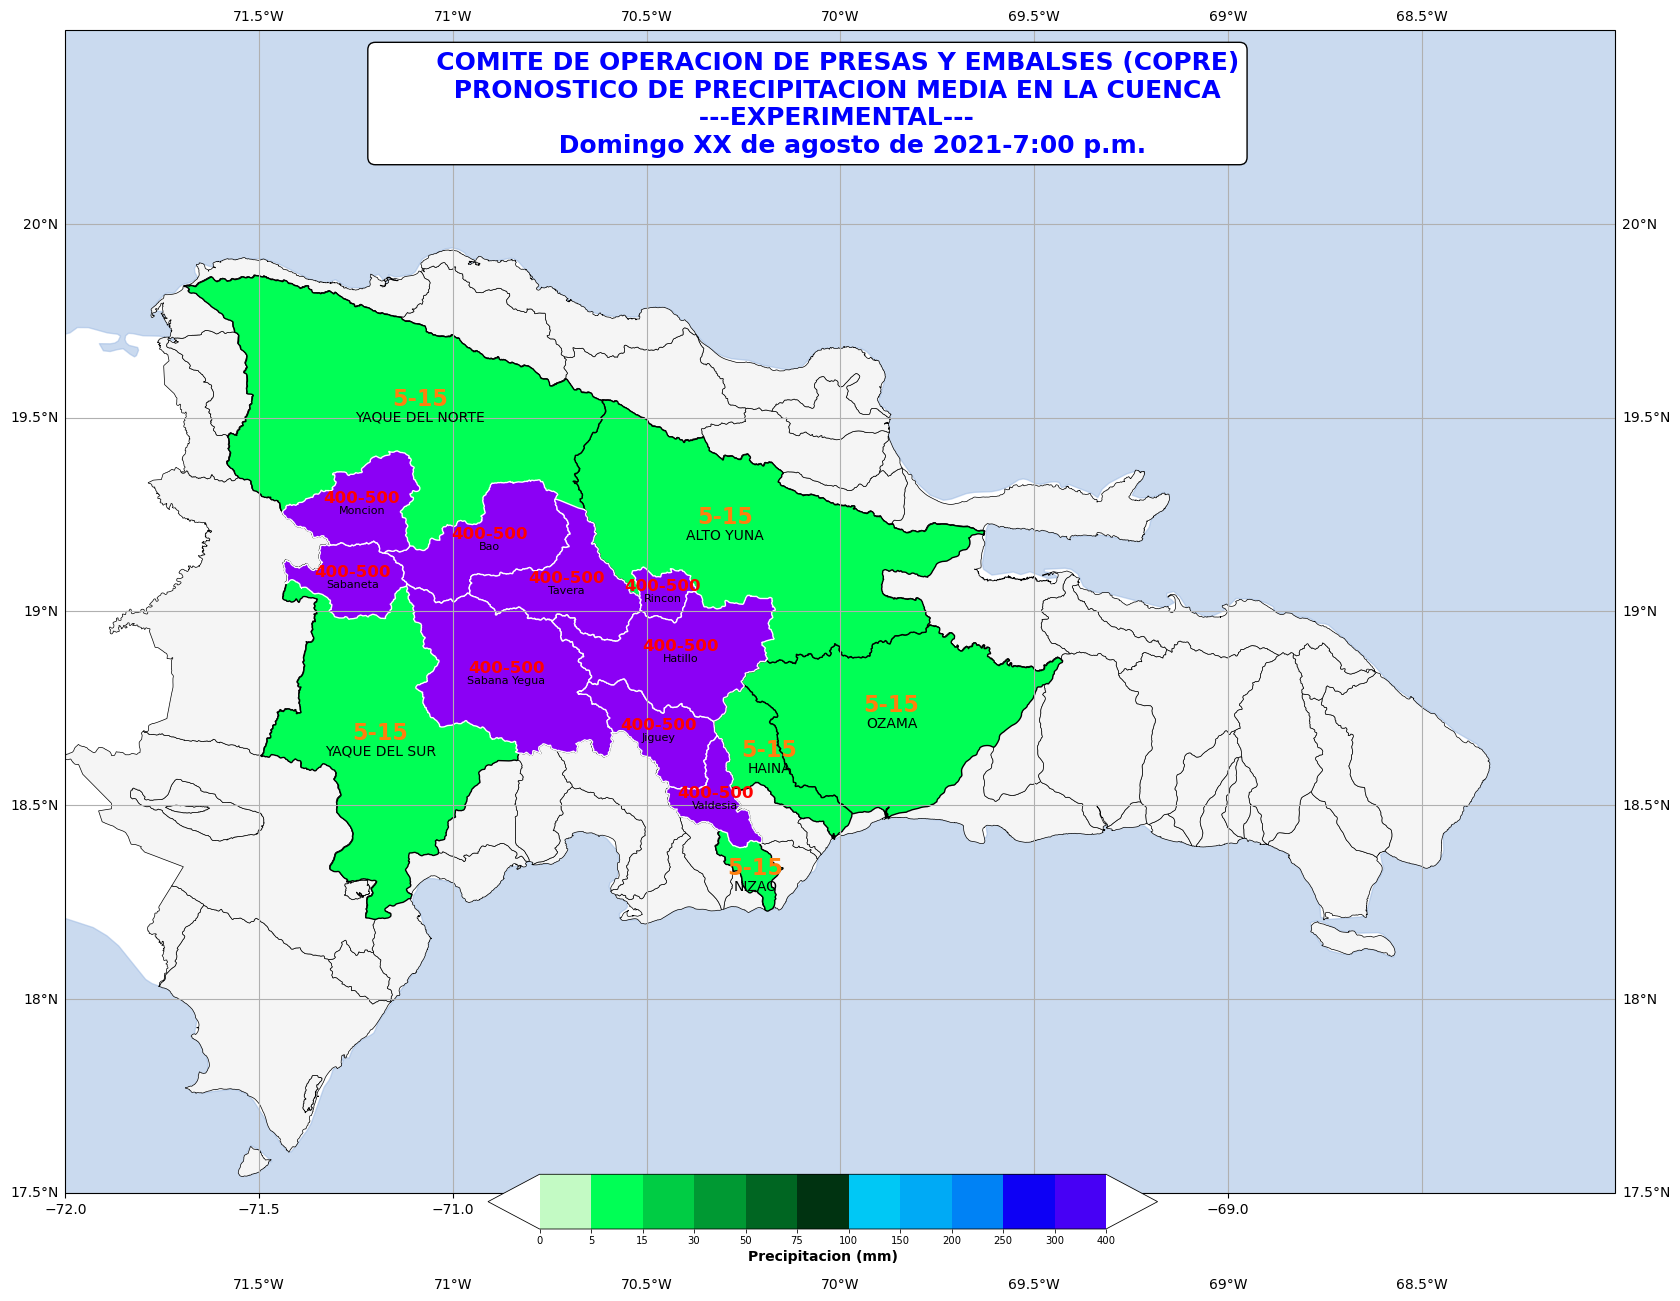

In [8]:
ax.set_extent([-72.0, -68, 17.5, 20.5])
xtcks = [-72, -71.5, -71, -70.5, -70, -69.5, -69.0]
ax.set_xticks(xtcks, crs=ccrs.PlateCarree())
# ax.set_yticks([-90, -60, -30, 0, 30, 60, 90], crs=ccrs.PlateCarree())
fig

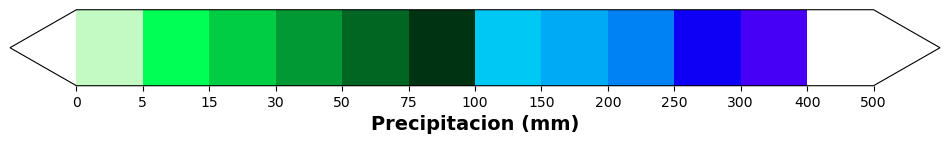

In [9]:
import matplotlib as mpl 


fig, ax = plt.subplots(figsize=(12, 2))
fig.subplots_adjust(bottom=0.5)


cmap = mpl.colors.ListedColormap(values_and_colors['colors'])
# cmap = mpl.colors.ListedColormap(['red',  'blue',  'green',   'yellow',  'black',  'white',  
#                                   'darkgray',  'brown',  'pink',   'violet',  'purple'])
bounds = [0, 5, 15, 30, 50, 75, 100, 150, 200, 250, 300, 400, 500]
cmap.set_over('none')
cmap.set_under('none')
norm = mpl.colors.BoundaryNorm(bounds, cmap.N + 1)
cb3 = mpl.colorbar.ColorbarBase(ax, cmap=cmap,
                                norm=norm,
                                boundaries=[-10] + bounds,
                                extend='both',
                                extendfrac='auto',
                                ticks=bounds,
                                spacing='uniform',
                                orientation='horizontal')
cb3.set_label('Precipitacion (mm)', fontsize = 14, weight = 'bold')
#plt.savefig('colorbar.png', transparent=True)

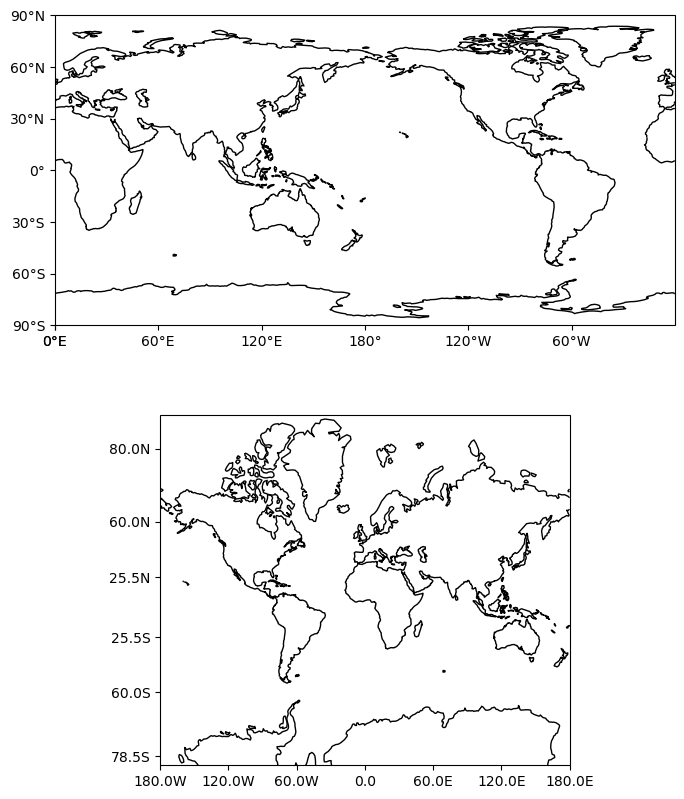

In [10]:
import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import matplotlib.pyplot as plt


def main():
    plt.figure(figsize=(8, 10))

    # Label axes of a Plate Carree projection with a central longitude of 180:
    ax1 = plt.subplot(211, projection=ccrs.PlateCarree(central_longitude=180))
    ax1.set_global()
    ax1.coastlines()
    ax1.set_xticks([0, 60, 120, 180, 240, 300, 360], crs=ccrs.PlateCarree())
    ax1.set_yticks([-90, -60, -30, 0, 30, 60, 90], crs=ccrs.PlateCarree())
    lon_formatter = LongitudeFormatter(zero_direction_label=True)
    lat_formatter = LatitudeFormatter()
    ax1.xaxis.set_major_formatter(lon_formatter)
    ax1.yaxis.set_major_formatter(lat_formatter)

    # Label axes of a Mercator projection without degree symbols in the labels
    # and formatting labels to include 1 decimal place:
    ax2 = plt.subplot(212, projection=ccrs.Mercator())
    ax2.set_global()
    ax2.coastlines()
    ax2.set_xticks([-180, -120, -60, 0, 60, 120, 180], crs=ccrs.PlateCarree())
    ax2.set_yticks([-78.5, -60, -25.5, 25.5, 60, 80], crs=ccrs.PlateCarree())
    lon_formatter = LongitudeFormatter(number_format='.1f',
                                       degree_symbol='',
                                       dateline_direction_label=True)
    lat_formatter = LatitudeFormatter(number_format='.1f',
                                      degree_symbol='')
    ax2.xaxis.set_major_formatter(lon_formatter)
    ax2.yaxis.set_major_formatter(lat_formatter)

    plt.show()


if __name__ == '__main__':
    main()

In [11]:
inside_coords_lat = [18.57588448762174, 18.75760134123338, 18.72853130712674, 19.115888515208702, 19.4101306566612, 
                    18.614190289673694]

inside_coords_lon = [-70.38387673247053, -71.0865047734343, -69.86783027131499, -70.2772762654869, -71.08462067184799,
                     -70.1829676153929]

cuencas_hidro_gdf['INSIDE_COORDS_LAT'] = inside_coords_lat
cuencas_hidro_gdf['INSIDE_COORDS_LON'] = inside_coords_lon

cuencas_hidro_gdf = cuencas_hidro_gdf[['NOMBRE', 'PP', 'INSIDE_COORDS_LAT', 'INSIDE_COORDS_LON', 'geometry']]
cuencas_hidro_gdf

,NOMBRE,PP,INSIDE_COORDS_LAT,INSIDE_COORDS_LON,geometry
28,NIZAO,5-15,18.575884,-70.383877,"POLYGON ((-70.32842 18.71654, -70.32844 18.716..."
47,YAQUE DEL SUR,5-15,18.757601,-71.086505,"POLYGON ((-71.33240 18.60752, -71.33278 18.607..."
48,OZAMA,5-15,18.728531,-69.867830,"POLYGON ((-70.17014 18.74600, -70.17038 18.746..."
50,ALTO YUNA,5-15,19.115889,-70.277276,"POLYGON ((-70.51762 19.00284, -70.51726 19.005..."
54,YAQUE DEL NORTE,5-15,19.410131,-71.084621,"POLYGON ((-71.69467 19.83983, -71.69463 19.839..."
55,HAINA,5-15,18.614190,-70.182968,"POLYGON ((-70.32844 18.71629, -70.32842 18.716..."


In [12]:
# cuencas_hidro_gdf['PP'] = pp
# cuencas_hidro_gdf = cuencas_hidro_gdf[['NOMBRE', 'PP', 'geometry']]

In [13]:
cuencas_hidro_gdf

,NOMBRE,PP,INSIDE_COORDS_LAT,INSIDE_COORDS_LON,geometry
28,NIZAO,5-15,18.575884,-70.383877,"POLYGON ((-70.32842 18.71654, -70.32844 18.716..."
47,YAQUE DEL SUR,5-15,18.757601,-71.086505,"POLYGON ((-71.33240 18.60752, -71.33278 18.607..."
48,OZAMA,5-15,18.728531,-69.867830,"POLYGON ((-70.17014 18.74600, -70.17038 18.746..."
50,ALTO YUNA,5-15,19.115889,-70.277276,"POLYGON ((-70.51762 19.00284, -70.51726 19.005..."
54,YAQUE DEL NORTE,5-15,19.410131,-71.084621,"POLYGON ((-71.69467 19.83983, -71.69463 19.839..."
55,HAINA,5-15,18.614190,-70.182968,"POLYGON ((-70.32844 18.71629, -70.32842 18.716..."
